In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

In [4]:
df = pd.read_csv("../sample/sample-ok.csv")
df.head()

,throughput,delay,jitter,packet_loss,availability,label
0,327.762398,15.956707,2.279041,0.070210,99.938382,Normal
1,339.496604,15.725887,0.086720,0.015502,99.938754,Normal
2,241.439079,29.803152,3.944984,0.086038,99.374105,Normal
3,261.954409,31.189321,5.166384,0.184901,99.575140,Normal
4,337.994923,17.842319,2.291034,0.037289,99.929569,Normal


In [205]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [ ]:
X = df[['throughput', 'delay', 'jitter', 'packet_loss', 'av']]
y = df['label']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[0.02821322, 0.40229356, 0.32677377, 0.31002529],
       [0.08598953, 0.26753227, 0.63474338, 0.52339644],
       [0.04503839, 0.15191914, 0.48359149, 0.04110075],
       ...,
       [0.13638067, 0.40945551, 0.34721933, 0.40609758],
       [0.47587479, 0.00887048, 0.01798856, 0.00695783],
       [0.49110471, 0.01019195, 0.03747682, 0.0078522 ]])

In [209]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [210]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

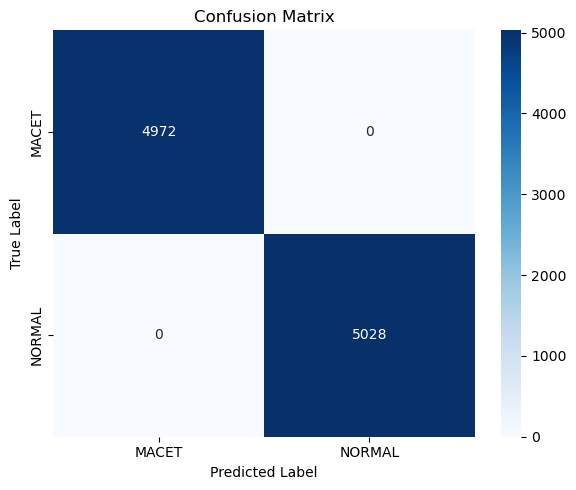

In [211]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test)))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

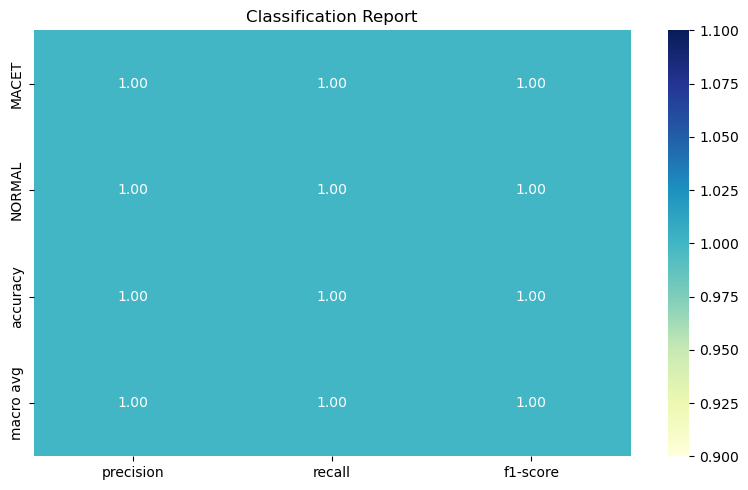

In [212]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.tight_layout()
plt.show()

In [213]:
print(f"Akurasi   : {accuracy:.2f}%")
print(f"Presisi   : {precision:.2f}%")
print(f"Recall    : {recall:.2f}%")
print(f"F1-Score  : {f1:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))


Akurasi   : 100.00%
Presisi   : 100.00%
Recall    : 100.00%
F1-Score  : 100.00%

Classification Report:
              precision    recall  f1-score   support

       MACET       1.00      1.00      1.00      4972
      NORMAL       1.00      1.00      1.00      5028

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [214]:
joblib.dump(model, 'model-network-perfomance-nb.sav')
print("Model berhasil disimpan sebagai 'model-network-perfomance-nb.sav'")

Model berhasil disimpan sebagai 'model-network-perfomance-nb.sav'
